# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

  Using cached pip-21.0-py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.4-py2.py3-none-any.whl (1.5 MB)
Processing ./ait_sdk-0.1.5-py3-none-any.whl
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached numpy-1.19.3-cp36-cp36m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached psutil-5.7.3-cp36-cp36m-linux_x86_64.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached PyYAML-5.4.1-cp36-cp36m-manylinux1_x86_64.whl (640 kB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached testpath-0.4.4-py2.py3-none-any.whl (163 kB)
  Using cached Pygments-2.7.4-py3-none-any.whl (950 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached defusedxml-0.6.0-py2.py3-none-any.whl (23 kB)
  Using cached jupyter_core-4.7.0-py3-none-any.whl (82 kB

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('matplotlib', '3.3.1')
    requirements_generator.add_package('numpy', '1.19.1')
    requirements_generator.add_package('pandas', '1.1.1')
    requirements_generator.add_package('seaborn', '0.10.1')
    requirements_generator.add_package('scipy', '1.5.2')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.5-py3-none-any.whl
  Using cached numpy-1.19.1-cp36-cp36m-manylinux2010_x86_64.whl (14.5 MB)
  Using cached scipy-1.5.2-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires h5py<2.11.0,>=2.10.0, but you have h5py 3.1.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.1 which is incompatible.
tensorflow

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
from typing import List
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from os import makedirs, path

from ait_sdk.utils.mnist import MNIST

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_mnist_bw_classify')
    manifest_genenerator.set_ait_description('''
    Calculate the black and white classification of the dataset MNIST images.\n
    \n
    Evaluation value: whole class\n
    Percentage of white ratio\n
    standard deviation\n
    \n
    Resource Output:\n
    Pixel mean and standard deviation by class\n
    Normal distribution of pixels by class\n
    \n
    Other outputs: none\n
    ''')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Distribution_of_training_data')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='test_set_images', 
                                             type_='dataset', 
                                             description='Image set (MNIST format)', 
                                             format_=['gz'], 
                                             schema='http://yann.lecun.com/exdb/mnist/')
    manifest_genenerator.add_ait_inventories(name='test_set_labels', 
                                             type_='dataset', 
                                             description='Image label (MNIST format)', 
                                             format_=['gz'], 
                                             schema='http://yann.lecun.com/exdb/mnist/')
    manifest_genenerator.add_ait_parameters(name='average_weight', 
                                            type_='bool', 
                                            description='pixel average calculation with weight\n[True or False]', 
                                            default_val='True')
    manifest_genenerator.add_ait_parameters(name='image_px_size', 
                                            type_='int', 
                                            description='prediction image pixel size', 
                                            default_val='28')
    manifest_genenerator.add_ait_measures(name='bw_probabl', 
                                          type_='float', 
                                          description='''Black - White probabl\n\nex)\n
                                          Black=6000, White=4000 then BW_probabl=1.5''', 
                                          structure='single', 
                                          min='0')
    manifest_genenerator.add_ait_measures(name='bw_std', 
                                          type_='float', 
                                          description='standard deviation', 
                                          structure='single', 
                                          min='0')
    manifest_genenerator.add_ait_measures(name='bw_probabl_per_class', 
                                          type_='float', 
                                          description='bw_probabl per class', 
                                          structure='sequence', 
                                          min='0')
    manifest_genenerator.add_ait_measures(name='bw_std_per_class', 
                                          type_='float', 
                                          description='bw_std per class', 
                                          structure='sequence', 
                                          min='0')
    manifest_genenerator.add_ait_resources(name='BWClassifyResultCSV', 
                                           type_='table', 
                                           description='\'ClassNo\', \'data_num\', \'mean\', \'std\', \'b_num\', \'w_num\'')
    manifest_genenerator.add_ait_resources(name='BWHistgram', 
                                           type_='picture', 
                                           description='Distribution of average (normalized) pixel values')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AITLog')
    manifest_genenerator.add_ait_downloads(name='BWClassifyResult', 
                                           description='ID,Class,Index,Pixel average (normalized),B/W')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='test_set_images',
                                        value='fmnist/test_set_images/train-images-idx3-ubyte.gz')
    input_generator.add_ait_inventories(name='test_set_labels',
                                        value='fmnist/test_set_labels/train-labels-idx1-ubyte.gz')
    input_generator.set_ait_params(name='average_weight',
                                   value='True')
    input_generator.set_ait_params(name='image_px_size',
                                   value='28')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
@log(logger, log_func_args=False)
def calc_average(X_test_normalize, target_indexes, classes, with_weight: bool, summary_cls_data:np.ndarray):
    mean_by_image = {}
    mean_by_class = {}
    detail_cls_data = np.zeros((0, 4))

    average_weight = np.array([
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4],
        [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4],
        [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4],
        [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1]]
        )

    for c in classes:
        if with_weight:
            mean_by_image[c] = [np.average(X_test_normalize[i].flatten(), weights=average_weight.flatten()) for i in target_indexes[c]]
        else:
            mean_by_image[c] = [X_test_normalize[i].mean() for i in target_indexes[c]]
        np_target_means = np.array(mean_by_image[c])
        mean = np_target_means.mean()
        mean_by_class[c] = mean
        std = np.std(np_target_means)

        summary_cls_data[c] = [len(mean_by_image[c]), 
                                   mean, 
                                   std, 
                                   len(np.where(mean_by_image[c] > mean)[0]),
                                   len(np.where(mean_by_image[c] <= mean)[0])]

        # 返却用データ作成
        index = 0
        detail_cls_lines = []
        for m in mean_by_image[c]:
            detail_cls_lines.append([c, target_indexes[c][index], m, ('WHITE' if m > mean else 'BLACK')])
            index += 1
        detail_cls_data = np.vstack((detail_cls_data, detail_cls_lines))

    sums = np.sum(summary_cls_data[0: len(classes)], axis=0)
    means = np.mean(summary_cls_data[0: len(classes)], axis=0)
    summary_cls_data[-1] = [sums[0], means[1], means[2], sums[3], sums[4]]

    detail_cls_df = pd.DataFrame(detail_cls_data,
                                 columns=['class', 'image_index', 'normalized_mean', 'b/w'])
    detail_cls_df['class'] = detail_cls_df['class'].astype(np.int64)
    detail_cls_df['image_index'] = detail_cls_df['image_index'].astype(np.int64)

    return mean_by_image, mean_by_class, detail_cls_df

@log(logger, log_func_args=False)
def save_histgram_core(classes, file_path, means, mean) -> List[str]:
    Path(file_path).parent.mkdir(parents=True, exist_ok=True)

    out_files = []

    for c in classes:

        out_file = file_path.format(c)
        out_files.append(out_file)

        fig = plt.figure(figsize=(10,5),dpi=100)
        plt.title(f'Image Mean Analyze Class:{c}')
        sns.distplot(means[c],
                    bins=min(512, np.unique(means[0]).size),
                    hist_kws={'color':'green','label':"data"},
                    kde=True,
                    kde_kws={'color': 'black', 'label': 'kde'}, 
                    fit=stats.norm,
                    fit_kws={'color': 'blue', 'label': 'norm'})

        plt.axvline(x=float(mean[c]), ymin=0, ymax=len(means[c]), color='blue')
        plt.legend()
        plt.savefig(out_file)

    return out_files

In [12]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'bw_probabl')
def calc_bw_probabl(summary_cls_df):
    return (summary_cls_df['b_num']['total'] / summary_cls_df['w_num']['total'])

In [13]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'bw_std')
def calc_bw_std(summary_cls_df):
    return summary_cls_df['std']['total']

In [14]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'bw_probabl_per_class', is_many=True)
def calc_bw_probabl_per_class(summary_cls_df, classes):
    return [summary_cls_df['b_num'][f'class_{c}'] / summary_cls_df['w_num'][f'class_{c}'] for c in classes]

In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'bw_std_per_class', is_many=True)
def calc_bw_std_per_class(summary_cls_df, classes):
    return [summary_cls_df['std'][f'class_{c}'] for c in classes]

In [16]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'BWClassifyResultCSV', 'bw_classify_result.csv')
def save_result_csv(summary_cls_df, file_path: str=None) -> None:
    summary_cls_df.to_csv(file_path, header=True, index=True)

In [17]:
#########################################
# area:functions
# should edit
#########################################

@log(logger, log_func_args=False)
@resources(ait_output, path_helper, 'BWHistgram', 'bw_histgram_class_{}.png')
def save_histgram(mean_by_image, mean_by_class, classes, file_path: str=None) -> None:
    
    return save_histgram_core(classes, file_path, mean_by_image, mean_by_class)

In [18]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:

    shutil.move(get_log_path(), file_path)

In [19]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'BWClassifyResult', 'bw_classify_result.csv')
def save_bw_classify_result(detail_cls_df, file_path: str=None) -> None:

    detail_cls_df.to_csv(file_path, header=True, index=True)

In [20]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    image_px_size = ait_input.get_method_param_value('image_px_size')

    # インベントリのMNISTラベル・画像を読み込み
    mnist = MNIST()
    X_test = mnist.load_image(ait_input.get_inventory_path('test_set_images'), image_px_size)
    y_test = mnist.load_label(ait_input.get_inventory_path('test_set_labels'))

    # 前処理として、画像を最大値255で割って0.0 - 1.0に規格化
    X_test_normalize = X_test / 255

    # クラス分類
    classes = np.unique(y_test)
    target_indexes={}
    for c in classes:
        target_indexes[c] = np.where(y_test == c)[0]
    
    summary_cls_data = np.zeros((classes.shape[0]+1, 5))  # クラス数+合計行

    # 画素平均算出
    mean_by_image, mean_by_class, detail_cls_df = calc_average(X_test_normalize, target_indexes, classes, ait_input.get_method_param_value('average_weight'), summary_cls_data)
    summary_cls_df = pd.DataFrame(summary_cls_data,
                                  columns=['data_num', 'mean', 'std', 'b_num', 'w_num'],
                                  index=[x for x in [f'class_{c}' for c in classes]+['total']])
    summary_cls_df['data_num'] = summary_cls_df['data_num'].astype(np.int64)
    summary_cls_df['b_num'] = summary_cls_df['b_num'].astype(np.int64)
    summary_cls_df['w_num'] = summary_cls_df['w_num'].astype(np.int64)

    # measure bw_probabl
    calc_bw_probabl(summary_cls_df)

    # measure bw_std
    calc_bw_std(summary_cls_df)

    # measure bw_probabl_per_class
    calc_bw_probabl_per_class(summary_cls_df, classes)

    # measure bw_std_per_class
    calc_bw_std_per_class(summary_cls_df, classes)

    # resource BWClassifyResultCSV
    save_result_csv(summary_cls_df)

    # resource BWHistgram
    save_histgram(mean_by_image, mean_by_class, classes)

    # downloads Log
    move_log()

    # downloads BWClassifyResult
    save_bw_classify_result(detail_cls_df)


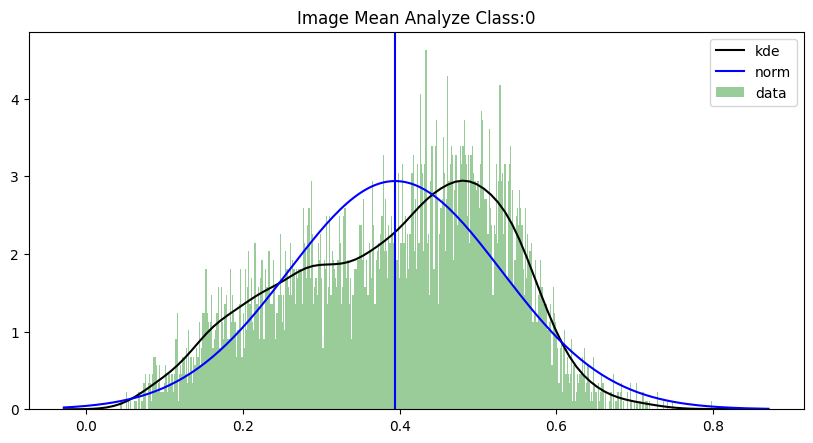

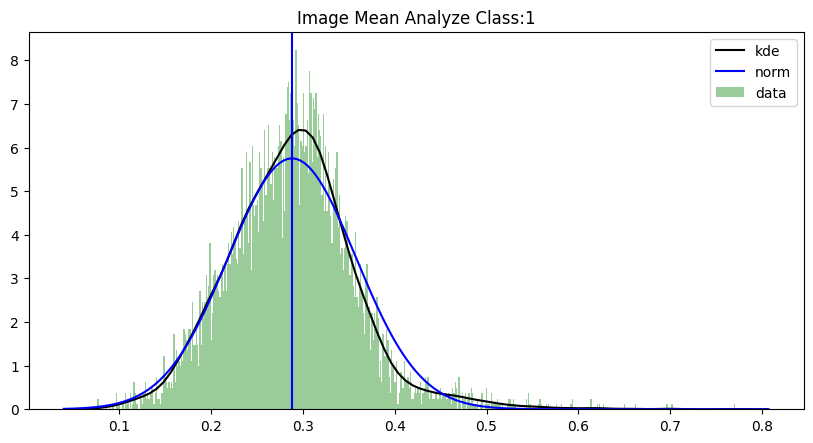

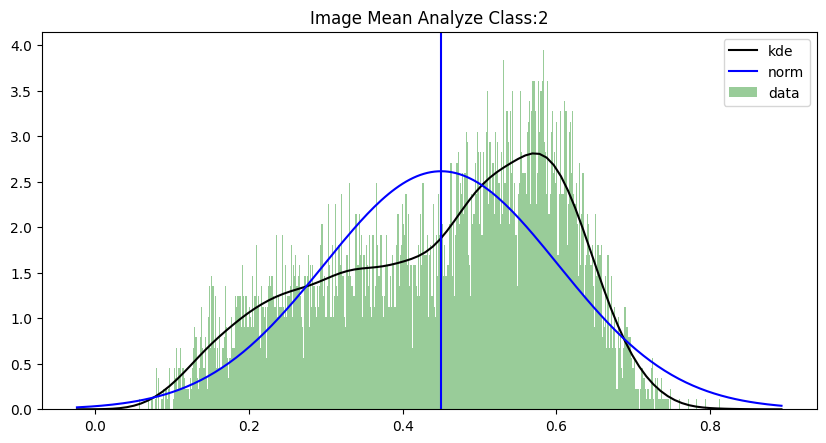

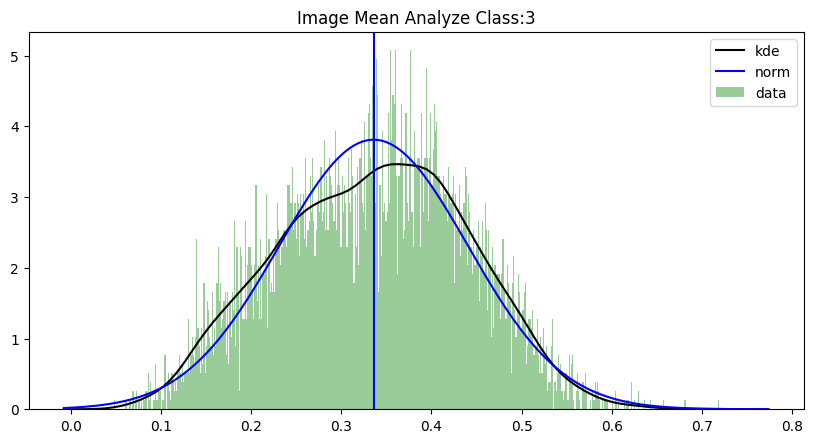

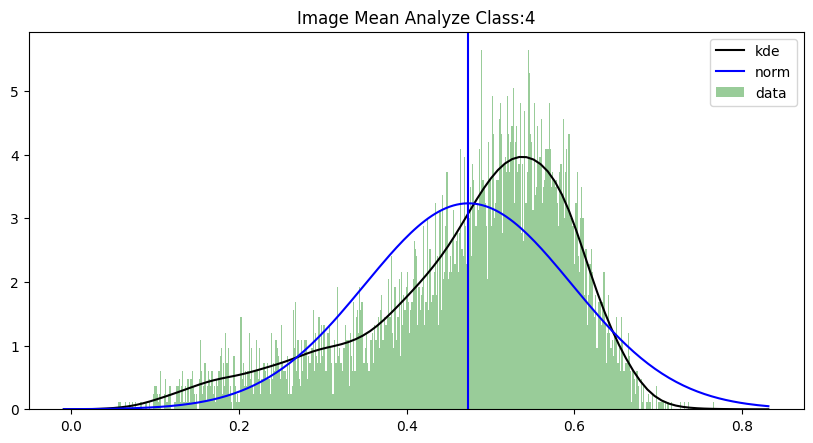

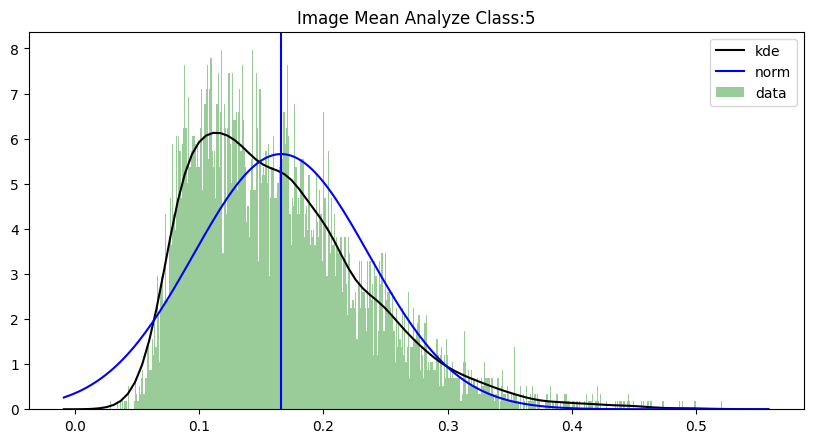

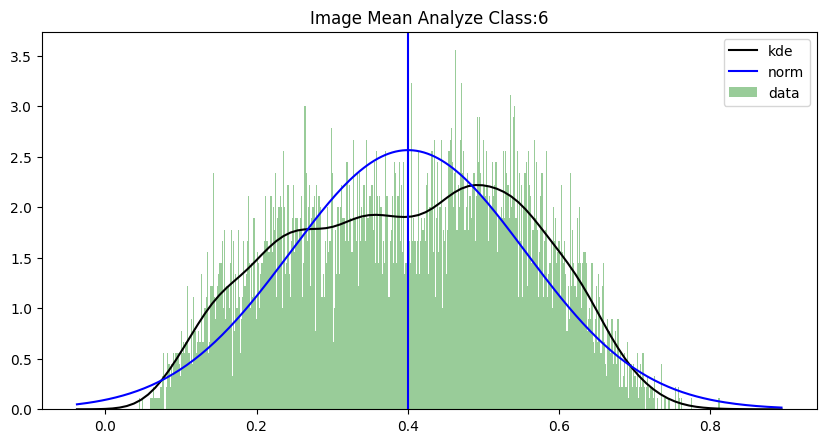

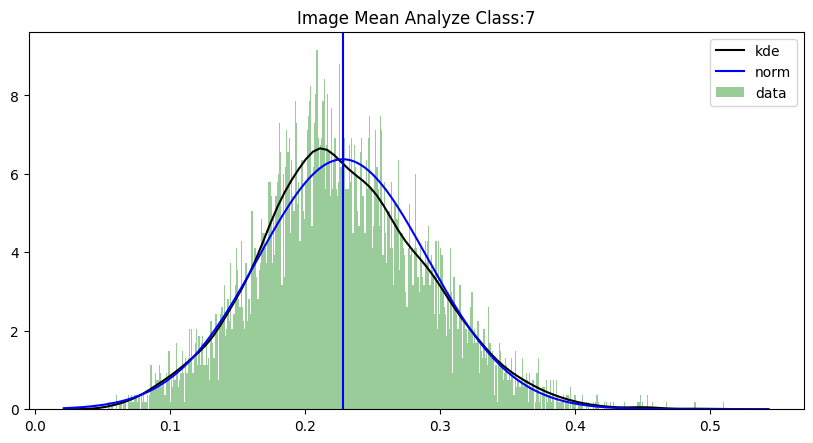

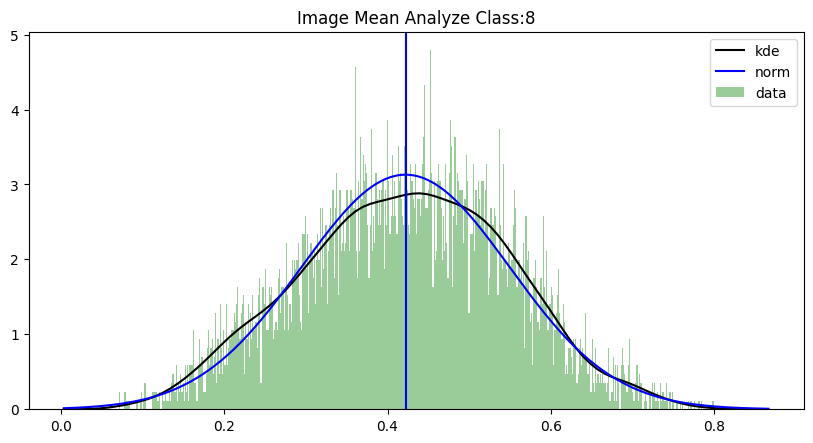

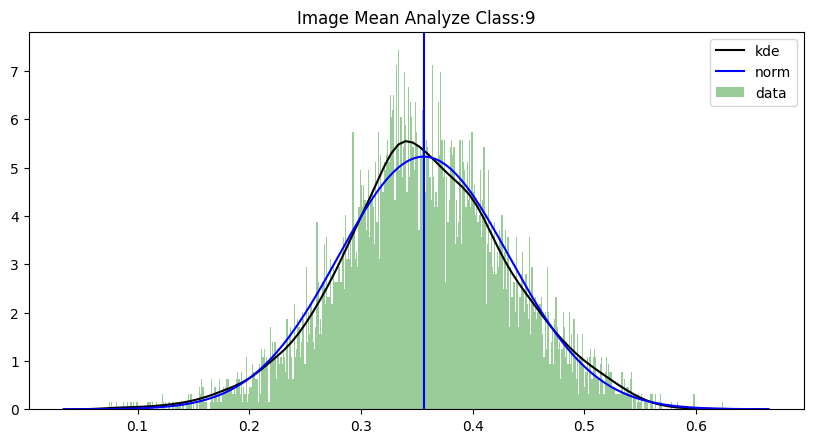

In [21]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [22]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [23]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
